<a href="https://colab.research.google.com/github/pedrosena138/if1007-tasi4/blob/main/Analise_de_casos_de_febre_amarela_em_humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}

plt.rcParams.update(params)
plt.style.use('seaborn')

In [14]:
df = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/fa_casoshumanos_1994-2021.csv', sep=';', encoding='latin-1')

In [15]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2758 non-null   int64  
 1   MACRORREG_LPI     2758 non-null   object 
 2   COD_UF_LPI        2758 non-null   int64  
 3   UF_LPI            2758 non-null   object 
 4   COD_MUN_LPI       2751 non-null   float64
 5   MUN_LPI           2752 non-null   object 
 6   SEXO              2757 non-null   object 
 7   IDADE             2756 non-null   object 
 8   DT_IS             2753 non-null   object 
 9   SE_IS             2742 non-null   float64
 10  MES_IS            2747 non-null   float64
 11  ANO_IS            2758 non-null   int64  
 12  MONITORAMENTO_IS  2758 non-null   object 
 13  OBITO             2758 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 301.8+ KB
None


,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,Alto Alegre,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,Pacaraima,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO
2,3,NE,21,MA,210060.0,Amarante do Maranhão,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,Amarante do Maranhão,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,Conceição do Araguaia,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM


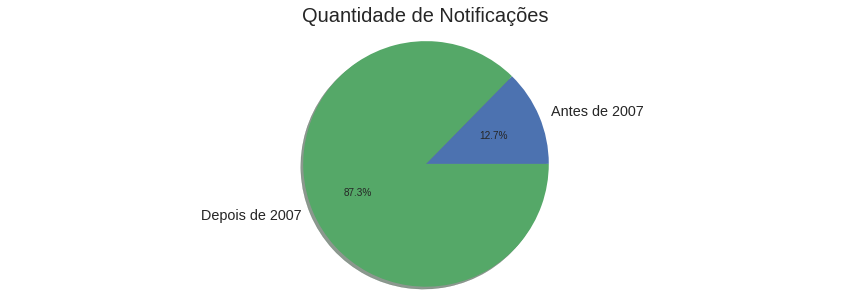

In [48]:
total = df.shape[0]
values = df.groupby(df['ANO_IS'] >= 2007).size().values
labels = ['Antes de 2007', 'Depois de 2007']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Quantidade de Notificações', fontsize=20)
plt.show()

In [58]:
df = df[df['ANO_IS'] >= 2007]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 349 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2409 non-null   int64  
 1   MACRORREG_LPI     2409 non-null   object 
 2   COD_UF_LPI        2409 non-null   int64  
 3   UF_LPI            2409 non-null   object 
 4   COD_MUN_LPI       2402 non-null   float64
 5   MUN_LPI           2403 non-null   object 
 6   SEXO              2408 non-null   object 
 7   IDADE             2408 non-null   object 
 8   DT_IS             2406 non-null   object 
 9   SE_IS             2406 non-null   float64
 10  MES_IS            2409 non-null   float64
 11  ANO_IS            2409 non-null   int64  
 12  MONITORAMENTO_IS  2409 non-null   object 
 13  OBITO             2409 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 282.3+ KB
None


,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
349,350,N,14,RR,140023.0,CAROEBE,M,15,12/02/2007,7.0,2.0,2007,2006/2007,SIM
350,351,N,13,AM,130250.0,MANACAPURU,M,33,03/03/2007,9.0,3.0,2007,2006/2007,SIM
351,352,N,13,AM,130185.0,IRANDUBA,M,21,17/03/2007,11.0,3.0,2007,2006/2007,SIM
352,353,CO,52,GO,521190.0,JATAÍ,M,23,10/04/2007,15.0,4.0,2007,2006/2007,SIM
353,354,CO,52,GO,521190.0,JATAÍ,M,54,20/04/2007,16.0,4.0,2007,2006/2007,SIM


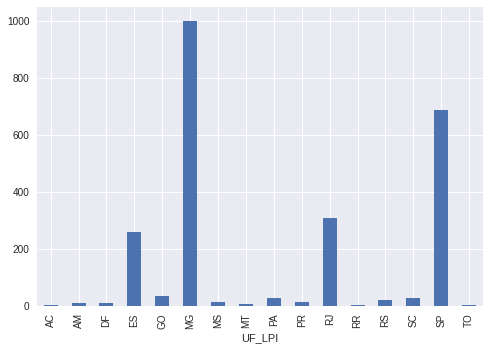

In [53]:
df.groupby('UF_LPI').size().plot(kind='bar')

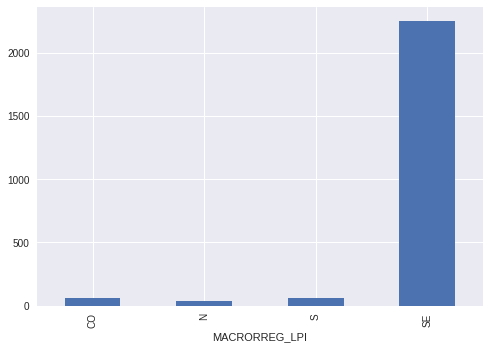

In [54]:
df.groupby('MACRORREG_LPI').size().plot(kind='bar')

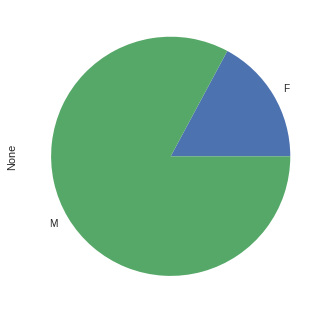

In [55]:
df.groupby('SEXO').size().plot(kind='pie')

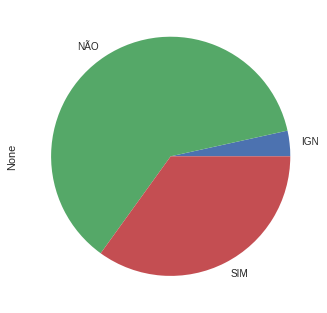

In [56]:
df.groupby('OBITO').size().plot(kind='pie')